In [5]:
%matplotlib inline
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=3).download()

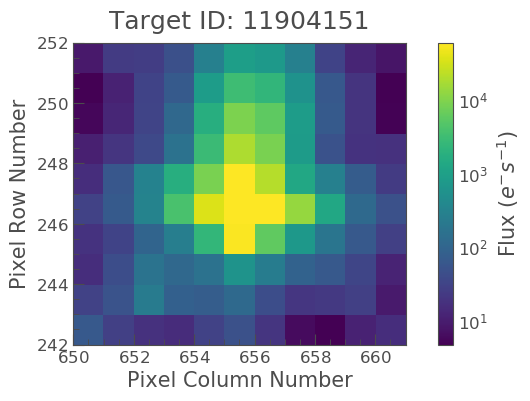

In [6]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [8]:
print(tpf.pipeline_mask)
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

[[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False  True  True False False False False]
 [False False False  True  True  True  True  True  True False False]
 [False False False  True  True  True  True  True False False False]
 [False False False False False  True  True False False False False]
 [False False False False False  True  True False False False False]
 [False False False False False  True  True False False False False]
 [False False False False False False False False False False False]]


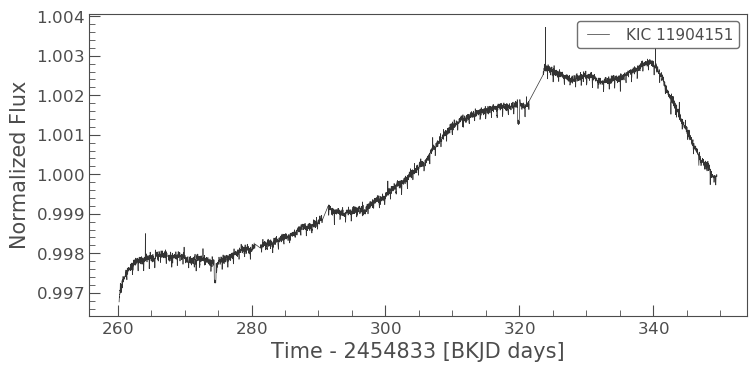

In [9]:
lc.plot()

In [17]:
flat, trend = lc.flatten(window_length=301,return_trend=True)

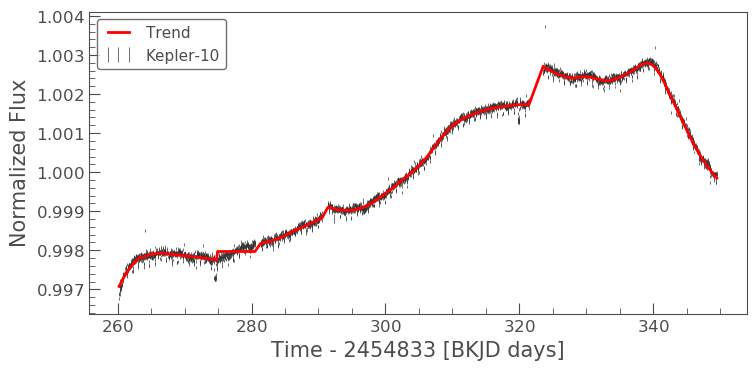

In [18]:
ax = lc.errorbar(label="Kepler-10")
trend.plot(ax=ax, color='red', lw=2, label='Trend')

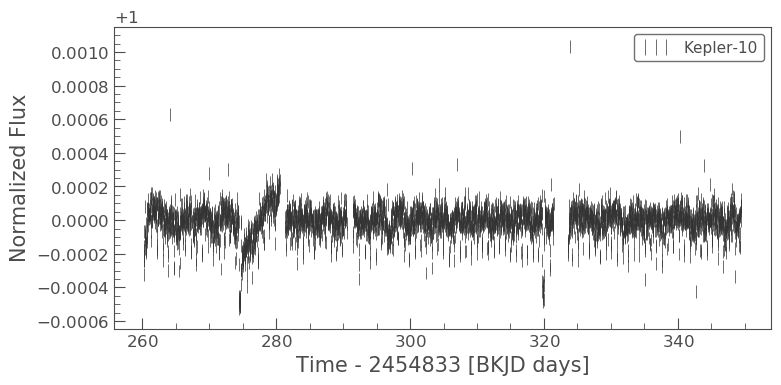

In [19]:
flat.errorbar(label="Kepler-10")

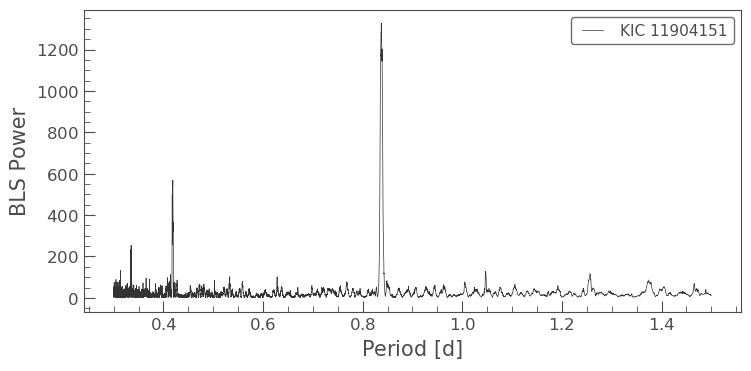

In [42]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", minimum_period=0.3, maximum_period=1.5)
periodogram.plot();

In [21]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period:{:.3f}'.format(best_fit_period))

Best fit period:0.837 d


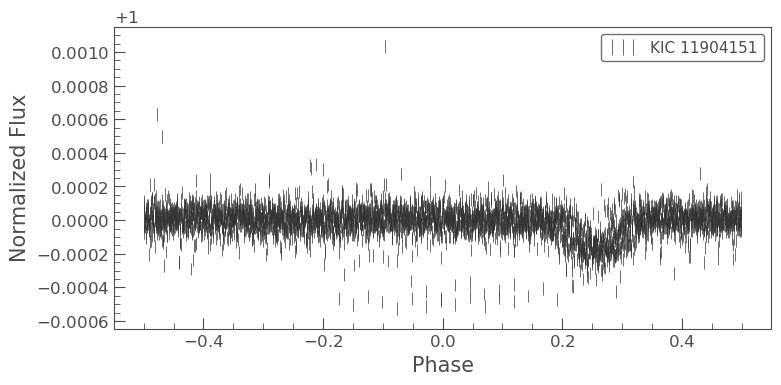

In [44]:
flat.fold(period=0.837, t0=periodogram.transit_time_at_max_power).errorbar();